<a href="https://colab.research.google.com/github/NotMark6/CCMACLRL_EXERCISES_COM221/blob/main/Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [68]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

## B. Load and understand the dataset

In [69]:
df = pd.read_csv('./Name.csv')
df.head()

,Name,Personality
0,Jeremie,Extrovert
1,Jhon,Extrovert
2,Jaris,Extrovert
3,John Francis,Extrovert
4,Osnei,Extrovert


1. Display the summary of all the features of the dataset using `.info()`

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         100 non-null    object
 1   Personality  100 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB


2. Display the total number of samples from each label using `.value_counts()`

In [71]:
df['Name'].value_counts()

,count
Name,
Jeremie,1
maeve,1
mylo,1
cryzel,1
miley,1
...,...
stefano,1
jude theo,1
gerico,1


## C. Split the dataset into training and test set

3. Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [80]:
Name_encoder = LabelEncoder()
X_encoded = Name_encoder.fit_transform(df['Name']).reshape(-1, 1)
X = df.drop(columns=['Name']).values
X = X_encoded

4. Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [81]:
target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(df['Personality'])
y = df['Personality'].values
y = y_encoded

5. Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(80, 1)
(80,)
(20, 1)
(20,)


## D. Create the model

6. Use KNN as a classifier by using `KNeighborsClassifier()`

In [83]:
knn = KNeighborsClassifier(n_neighbors=13)

7. Train the model using the `.fit()`

In [84]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

8. Test the model using the `.predict()`

In [85]:
y_pred = knn.predict(X_test)

## Evaluate the model

9. Create a confusion matrix

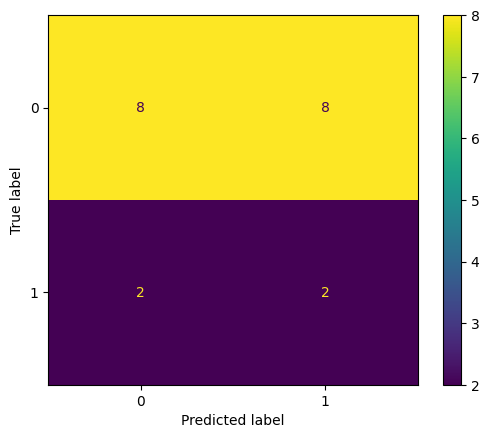

In [86]:
conf_matrix = confusion_matrix(y_pred, y_test, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=knn.classes_)
disp.plot()

10. Display the accuracy

In [97]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5


11. Display the precision

In [98]:
precision = precision_score(y_test, y_pred, average=None)
print("Precision:", precision)

Precision: [0.5 0.5]


12. Display the recall

In [99]:
recall = recall_score(y_test, y_pred, average=None)
print("Recall:", recall)

Recall: [0.8 0.2]


13. Display the f1-score

In [100]:
f1 = f1_score(y_test, y_pred, average=None)
print("f1-score:", f1)

f1-score: [0.61538462 0.28571429]
